# KMeans Algorithm
References: 
- https://github.com/khangich/machine-learning-interview/blob/master/sample/kmeans.ipynb

- https://github.com/bamtak/machine-learning-implemetation-python/blob/master/KMeans.ipynb

- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

Video: https://www.youtube.com/watch?v=hDmNF9JG3lo&list=PLy8ng74Z7EtMViEZJw83y_plQB8W0g15k



K-Means is a very simple clustering algorithm (clustering belongs to unsupervised learning). Given a fixed number of clusters and an input dataset the algorithm tries to partition the data into clusters such that the clusters have high intra-class similarity and low inter-class similarity.
Algorithm


The Kmeans Algorithm works as follows:
- Initialize *k* cluster centrouds:
- repeat the following:
    - for each point, compute which centroid is nearest to it
    - for each centroid, move its location to the mean location of the points that have been assigned to it 

### Objective function

The underlying objective function tries to find cluster centers such that, if the data are partitioned into the corresponding clusters, distances between data points and their closest cluster centers become as small as possible.

Given a set of datapoints ${x_1, ..., x_n}$ and a positive number $k$, find the clusters $C_1, ..., C_k$ that minimize
$$ J = \sum_{i=1}^n \, \sum_{j=1}^k \, z_{ij} \, || x_i - \mu_j ||_2 $$

where:

- $z_{ij} \in \{0,1\}$ defines whether of not datapoint $x_i$ belongs to cluster $C_j$
- $\mu_j$ denotes the cluster center of cluster $C_j$
- $|| \, ||_2$ denotes the Euclidean distance

### Disadvantages of K-Means

- The number of clusters has to be set in the beginning
- The results depend on the inital cluster centers
- It's sensitive to outliers
- It's not suitable for finding non-convex clusters
- It's not guaranteed to find a global optimum, so it can get stuck in a local minimum

# Method  1

In [1]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [3]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

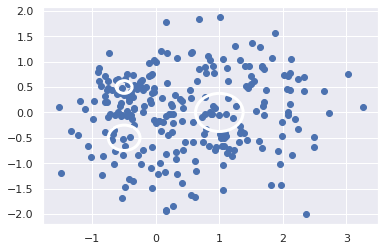

In [4]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

We now write a function that initializes k centroids by randomly selecting them from the data points.

In [10]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [11]:
initialize_centroids(points, 3)

array([[ 1.33013116,  1.03924766],
       [-0.4536806 , -0.0707799 ],
       [-0.55377832,  0.38941765]])

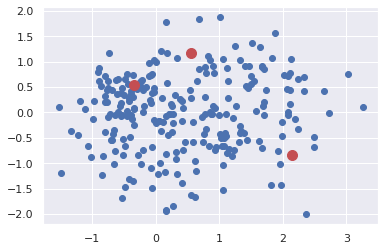

In [12]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

Now let's define a function that returns the closest centroid for each point. We will use numpy broadcasting to do this. If this code looks overly complicated, don't worry, we'll try to explain why it works in the next section.

In [16]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis = 2))
    return np.argmin(distances, axis = 0)

In [17]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
c_extended = centroids[:, np.newaxis]
c_extended

array([[[-0.34335307,  0.54466362]],

       [[ 0.55678599,  1.17106165]],

       [[ 2.15165002, -0.83545994]]])

In [22]:
p = points[0]
p

array([0.37380107, 0.27182969])

In [23]:
c_extended - p

array([[[-0.71715414,  0.27283393]],

       [[ 0.18298492,  0.89923196]],

       [[ 1.77784895, -1.10728963]]])

In [24]:
points[:4] 

array([[ 0.37380107,  0.27182969],
       [ 2.33804023,  0.69181434],
       [ 0.78005244, -0.02208068],
       [ 0.26576642, -0.04054896]])

In [25]:
points[:4] - c_extended

array([[[ 0.71715414, -0.27283393],
        [ 2.68139329,  0.14715072],
        [ 1.1234055 , -0.56674429],
        [ 0.60911948, -0.58521257]],

       [[-0.18298492, -0.89923196],
        [ 1.78125423, -0.47924731],
        [ 0.22326644, -1.19314233],
        [-0.29101958, -1.21161061]],

       [[-1.77784895,  1.10728963],
        [ 0.1863902 ,  1.52727428],
        [-1.37159759,  0.81337926],
        [-1.88588361,  0.79491098]]])

In [26]:
np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))

array([[0.76729943, 2.68542796, 1.25826826, 0.84468947],
       [0.91766094, 1.84459877, 1.21385193, 1.24607089],
       [2.09447779, 1.53860587, 1.59463656, 2.04656797]])

In [27]:
np.argmin(np.sqrt(((points[:4] - c_extended)**2).sum(axis=2)), axis=0)

array([0, 2, 1, 0])

The last step in the algorithm is to move the centroids to the mean location associated with it:

In [28]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [29]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 1.10225298,  1.11940535],
       [-0.38837115, -0.00452586],
       [ 1.31329002, -0.3469456 ]])

We can visualize these first two steps in the following way:

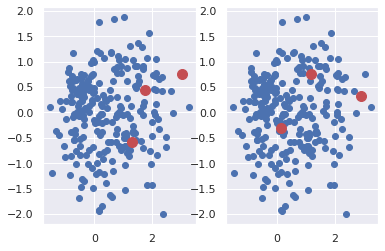

In [30]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# Method 2

In [37]:
# %load kmeans.py
import numpy as np
class KMeans:
    
    def __init__(self, n_clusters=4):
        self.K = n_clusters
        
    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
        
    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x)**2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])

### Evaluation

Automatically created module for IPython interactive environment


<ipython-input-39-378813cd6030>:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


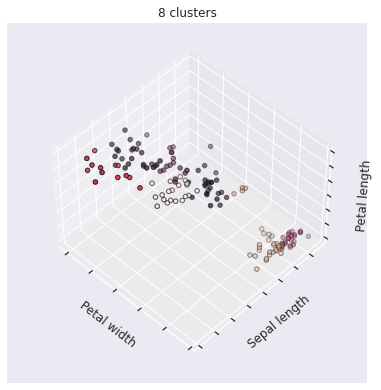

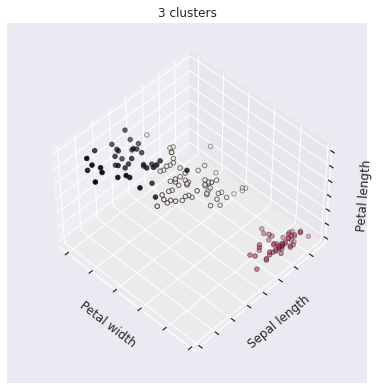

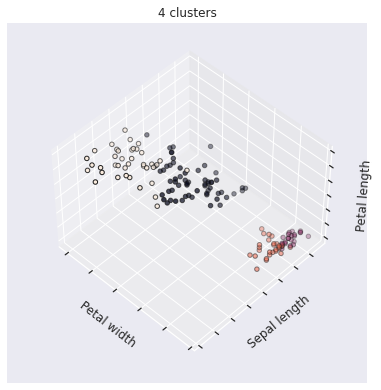

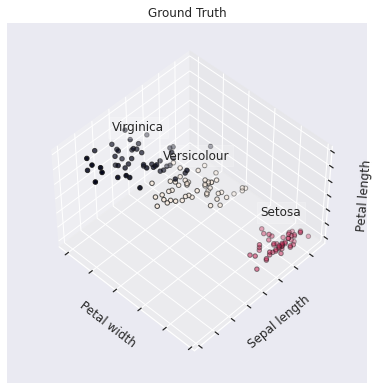

In [39]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_4', KMeans(n_clusters=4))]

fignum = 1
titles = ['8 clusters', '3 clusters', '4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()